In [1]:
# Agregamos la ruta donde se encuentran las funciones de utilidad
import sys
sys.path.insert(0, '../utils/')

# Import de librerías necesarias
import analysis_functions as fnc
import bootcampviztools as btcvt
from variables import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [2]:
df = pd.read_csv(TURISMO_ECO_ZERO_FILENAME_FINAL, sep=CSV_SEPARADOR_COLUMNAS)
df.head()

,ID,PROVINCIA,MARCA,MODELO,PROVINCIA_MATR,FECHA_MATR,FECHA_PRIM_MATR,TIPO_DGT,CAT_EURO,RENTING,...,POTENCIA,KW,PROPULSION,CATELECT,CONSUMO,AUTONOMIA,ALIMENTACION,TIPO_DISTINTIVO,EMISIONES_EURO,EMISIONES_CO2
0,13,Huelva,RENAULT,ARKANA E-TECH,Segovia,2022-06-28,2022-06-28,TURISMOS,M1,N,...,11.64,69.0,Gasolina,(HEV) Eléctrico Híbrido,0.0,0.0,Monofuel,ECO,EURO 6AP,108.0
1,22,Girona,HYUNDAI,KONA,Granada,2022-03-07,2022-03-07,TURISMOS,M1,N,...,11.56,77.2,Gasolina,(HEV) Eléctrico Híbrido,0.0,0.0,Monofuel,ECO,EURO 6AP,112.0
2,36,Alicante,KIA,NIRO,Álava,2018-03-28,2018-03-28,TURISMOS,M1,N,...,11.56,77.2,Gasolina,(HEV) Eléctrico Híbrido,0.0,0.0,Monofuel,ECO,EURO 6W,88.0
3,106,Ciudad Real,LEXUS,LEXUS NX300H,Madrid,2016-03-29,2016-03-29,TURISMOS,M1,N,...,0.15,114.0,Gasolina,(HEV) Eléctrico Híbrido,0.0,0.0,Monofuel,ECO,EURO 6W,121.0
4,143,Alicante,FORD,PUMA,La Coruña,2021-12-16,2021-12-16,TURISMOS,M1,N,...,7.82,91.9,Gasolina,(HEV) Eléctrico Híbrido,0.0,0.0,Monofuel,ECO,EURO 6AP,129.0


In [3]:
# Cambiamos el nombre de la columna 'Unnamed: 0' generada con el ID del archivo anterior y lo establecemos como indice.
#df.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
df.set_index('ID',inplace=True)

In [4]:
# Patrón para transformar a fechas los campos FECHA_MATR, FECHA_PRIM_MATR
patron = "%Y-%m-%d"

# ******* Campo: FECHA_MATR *******
df.FECHA_MATR = pd.to_datetime(df.FECHA_MATR, format = patron)

# ******* Campo: FECHA_PRIM_MATR *******
df.FECHA_PRIM_MATR = pd.to_datetime(df.FECHA_PRIM_MATR, format = patron)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1620160 entries, 13 to 37890848
Data columns (total 22 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   PROVINCIA        1620160 non-null  object        
 1   MARCA            1620160 non-null  object        
 2   MODELO           1620160 non-null  object        
 3   PROVINCIA_MATR   1620160 non-null  object        
 4   FECHA_MATR       1620160 non-null  datetime64[ns]
 5   FECHA_PRIM_MATR  1620160 non-null  datetime64[ns]
 6   TIPO_DGT         1620160 non-null  object        
 7   CAT_EURO         1620160 non-null  object        
 8   RENTING          1620160 non-null  object        
 9   TARA             1620160 non-null  int64         
 10  PESO_MAX         1620160 non-null  int64         
 11  CILINDRADA       1620160 non-null  int64         
 12  POTENCIA         1620160 non-null  float64       
 13  KW               1620160 non-null  float64       
 14  PROPU

In [6]:
fnc.card_tipo(df, umbral_categoria = 1000)

,Card,%_Card,Tipo,tipo_sugerido
PROVINCIA,52,0.00321,object,Categorica
MARCA,80,0.004938,object,Categorica
MODELO,1610,0.099373,object,Numerica discreta
PROVINCIA_MATR,53,0.003271,object,Categorica
FECHA_MATR,5274,0.325523,datetime64[ns],Numerica discreta
FECHA_PRIM_MATR,5742,0.354409,datetime64[ns],Numerica discreta
TIPO_DGT,1,0.0,object,Categorica
CAT_EURO,10,0.000617,object,Categorica
RENTING,3,0.000185,object,Categorica
TARA,1578,0.097398,int64,Numerica discreta


In [7]:
columns_categoricas = ['PROVINCIA', 'MARCA', 'MODELO', 'PROVINCIA_MATR', 'CAT_EURO', 
                       'RENTING', 'PROPULSION', 'CATELECT', 'ALIMENTACION', 'TIPO_DISTINTIVO', 
                       'EMISIONES_EURO'
]

columns_categoricas_binarias = ['RENTING','TIPO_DISTINTIVO']

columns_numericas =  ['FECHA_MATR', 'FECHA_PRIM_MATR', 'TARA', 'PESO_MAX', 'CILINDRADA', 
                      'POTENCIA', 'KW', 'CONSUMO', 'AUTONOMIA', 'EMISIONES_CO2'
]


# Categoricas

In [8]:
df[columns_categoricas].mode().T

,0
PROVINCIA,Madrid
MARCA,TOYOTA
MODELO,* ND *
PROVINCIA_MATR,Madrid
TIPO_DGT,TURISMOS
CAT_EURO,M1
RENTING,N
PROPULSION,Gasolina
CATELECT,(HEV) Eléctrico Híbrido
ALIMENTACION,Monofuel


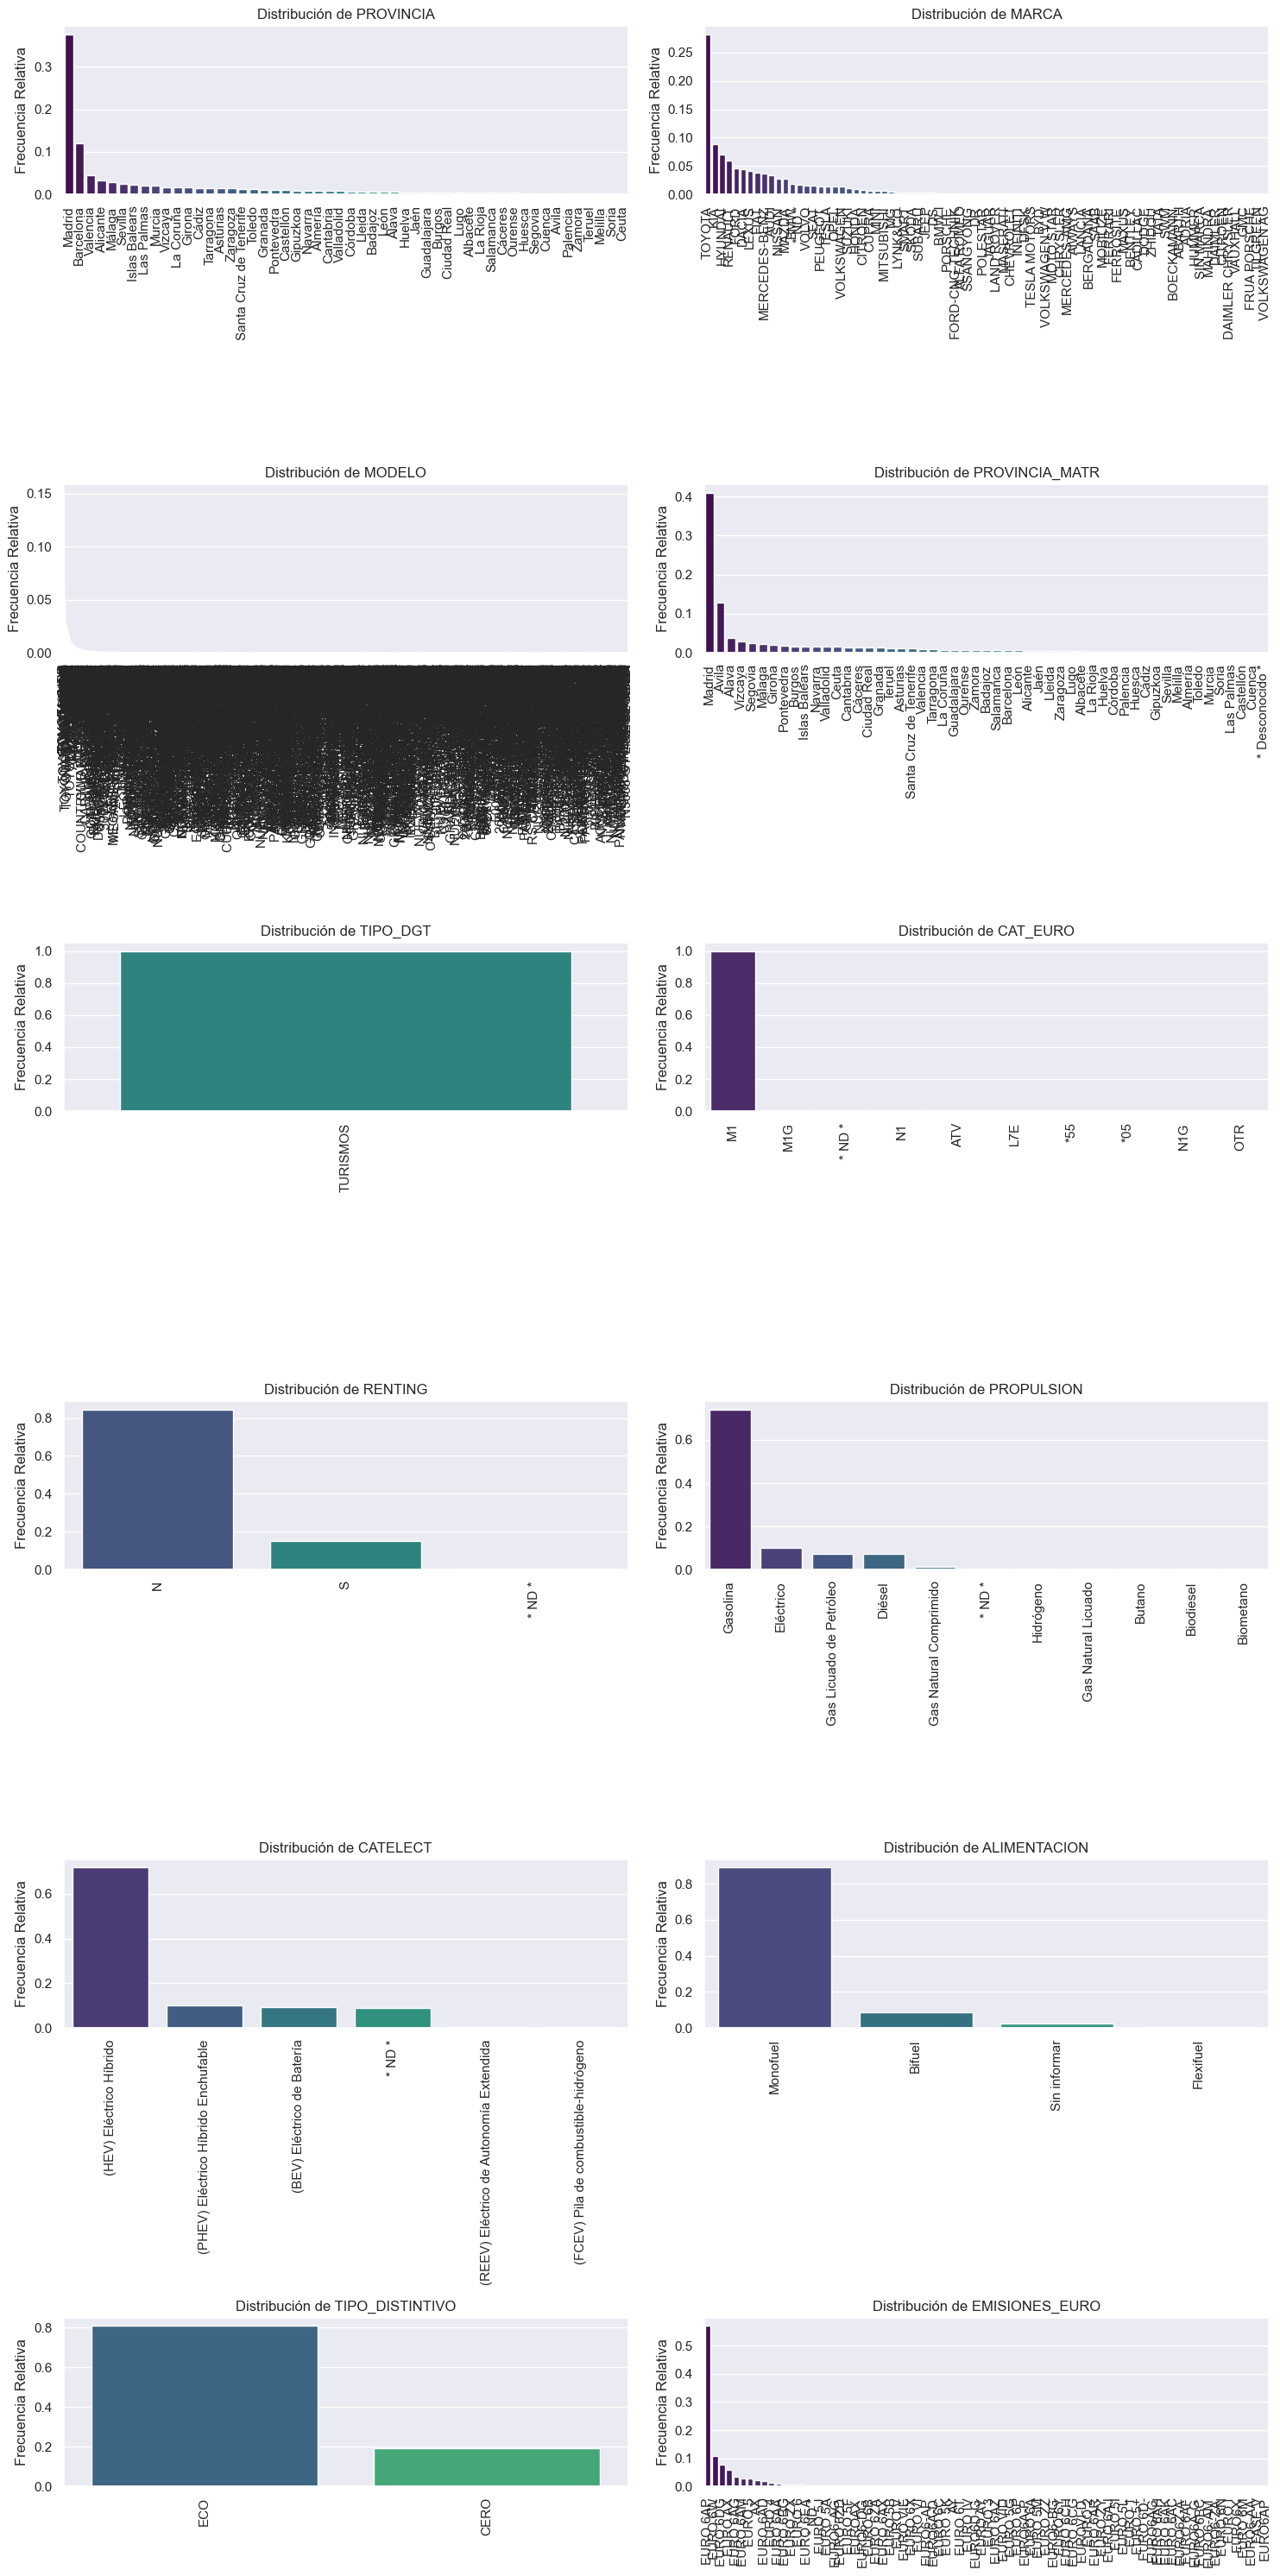

In [9]:
btcvt.pinta_distribucion_categoricas(df, columns_categoricas, relativa=True)

# Numericas

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
FECHA_MATR,1620160,2021-01-07 00:19:50.122456576,1991-10-23 00:00:00,2019-10-23 00:00:00,2021-10-22 00:00:00,2023-01-31 00:00:00,2023-12-29 00:00:00,NaN
FECHA_PRIM_MATR,1620160,2020-12-19 18:29:45.423661312,1900-04-21 00:00:00,2019-09-30 00:00:00,2021-10-06 00:00:00,2023-01-25 00:00:00,2023-12-29 00:00:00,NaN
TARA,1620160.0,1404.617848,0.0,1247.0,1410.0,1600.0,4880.0,341.291232
PESO_MAX,1620160.0,1968.814047,0.0,1805.0,1920.0,2155.0,7380.0,310.42869
CILINDRADA,1620160.0,1482.252876,0.0,1199.0,1580.0,1798.0,6417.0,658.27691
POTENCIA,1620160.0,7.383924,0.0,0.12,9.95,11.64,74.92,6.538887
KW,1620160.0,96.940249,0.0,72.0,88.3,114.0,999.99,47.512155
CONSUMO,1620160.0,31.6852,0.0,0.0,0.0,0.0,8300.0,66.722528
AUTONOMIA,1620160.0,3223.455447,-10.0,0.0,0.0,0.0,867900.0,10804.485248
EMISIONES_CO2,1620160.0,94.285135,-10.0,83.0,106.0,122.0,994.0,45.811903


(10, 2)


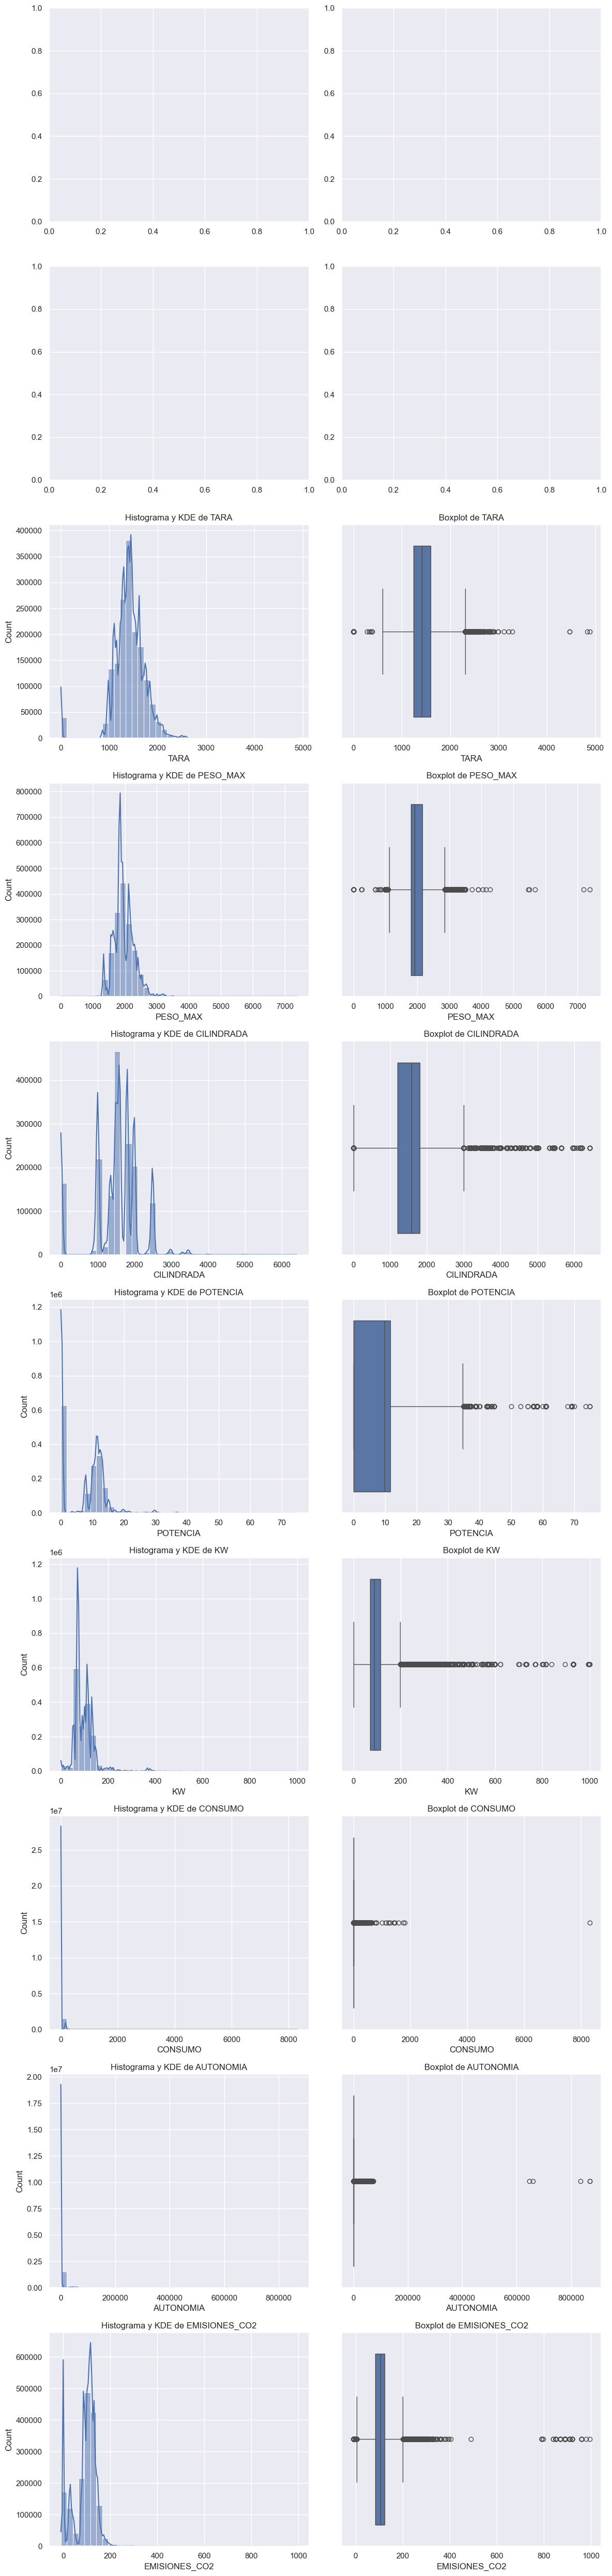

In [11]:
btcvt.plot_combined_graphs(df, columns_numericas, whisker_width=2, bins = 40)